# Credit Card Customer Segmentation - Cluster Analysis

This case requires to develop a customer segmentation to define marketing strategy. 

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. 

The file is at a customer level with 18 behavioral variables.

Dataset is taken from: https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
df.shape

(8950, 18)

In [4]:
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df.drop(['CUST_ID'], axis=1, inplace = True)

Yes, I dropped all the null rows. I didn't EDA and I feel shame for that :)
Still, my mission here is K-Means Clustering.
I could have used the code below to take care of the null values - could have used median and mean.

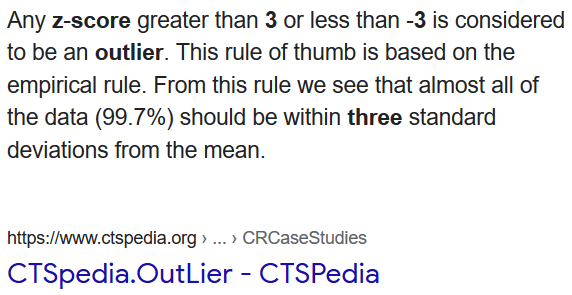

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


I will work on two notebooks and observe the difference. In the first one, I will fill the NaN's with the Mean value of the column and for the second, I will fill the NaN's with the Median.

**Case I - Use the mean Value to Fill NaNs** 

In [9]:
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [10]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [11]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


When filled with the Mean value, 'Min_Payments' column Median increased from 312 to 335.

In [13]:
df.shape

(8950, 17)

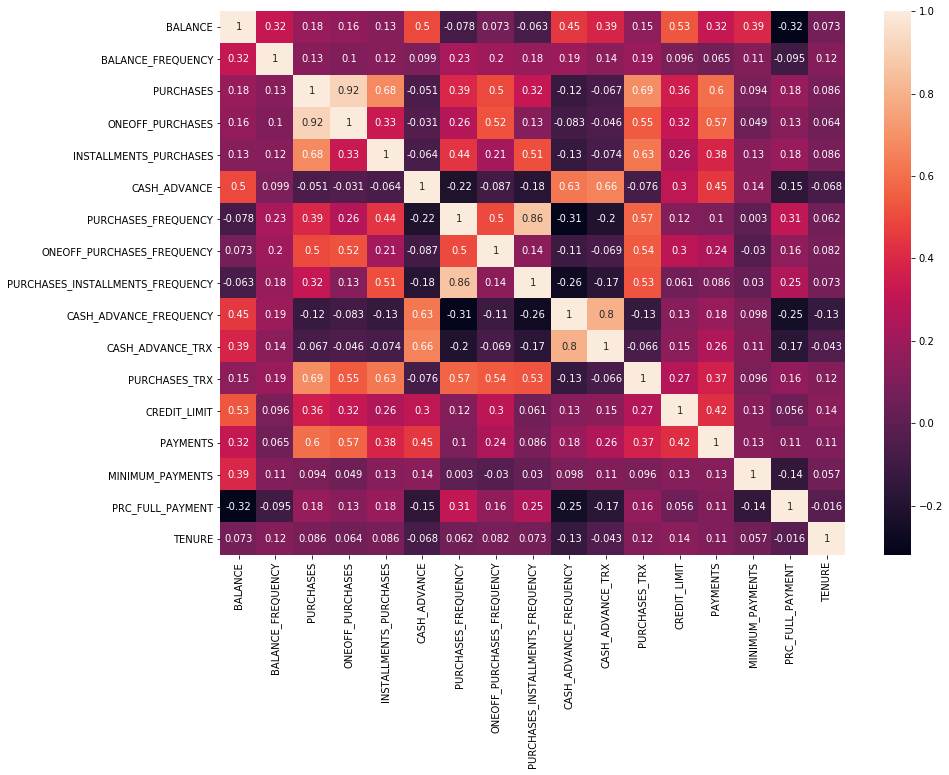

In [14]:
fig = plt.figure(figsize=(14,10))
sns.heatmap(df.corr() , annot=True);

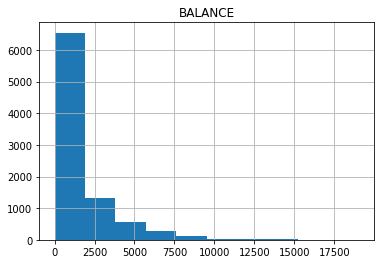

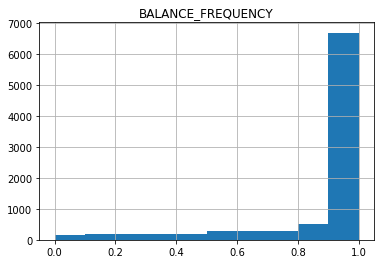

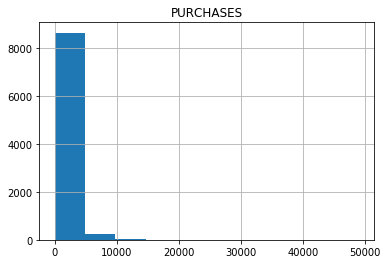

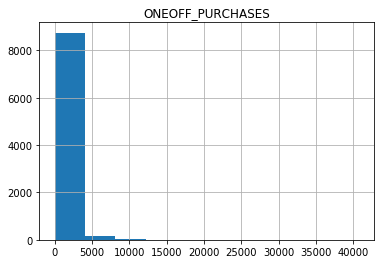

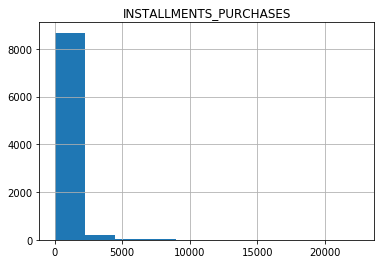

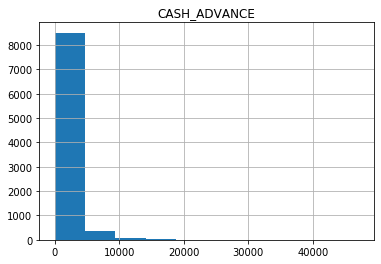

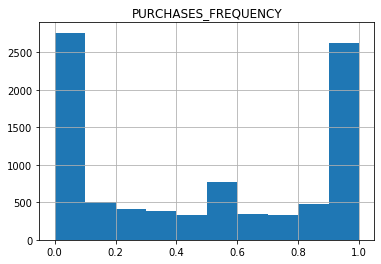

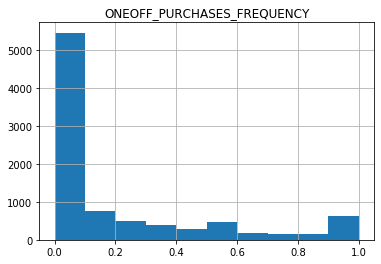

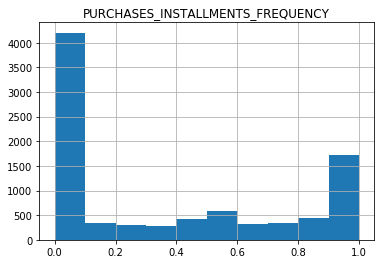

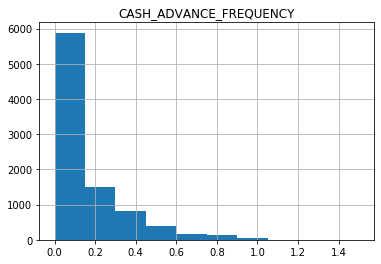

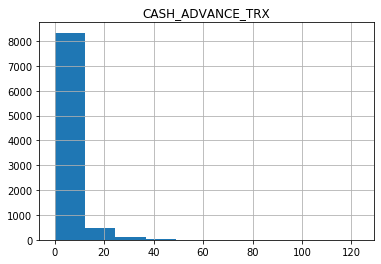

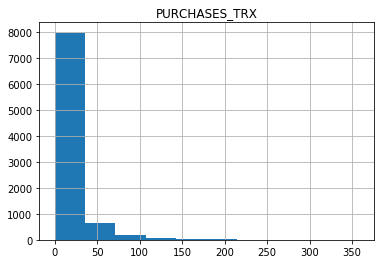

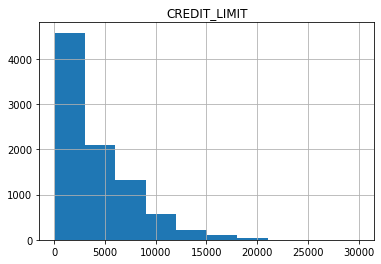

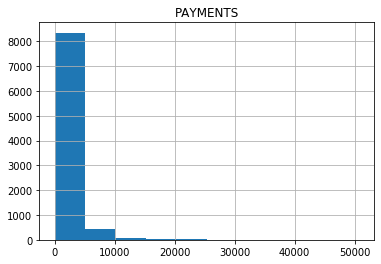

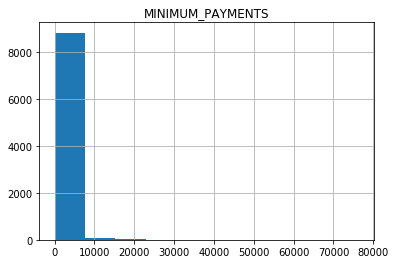

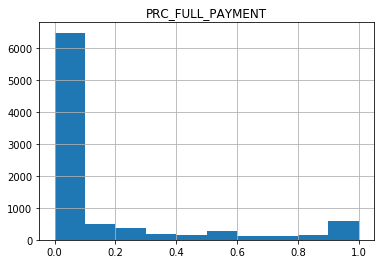

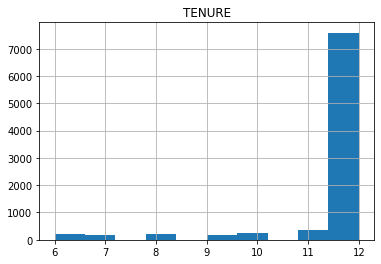

In [15]:
for col in df:
    df[[col]].hist()

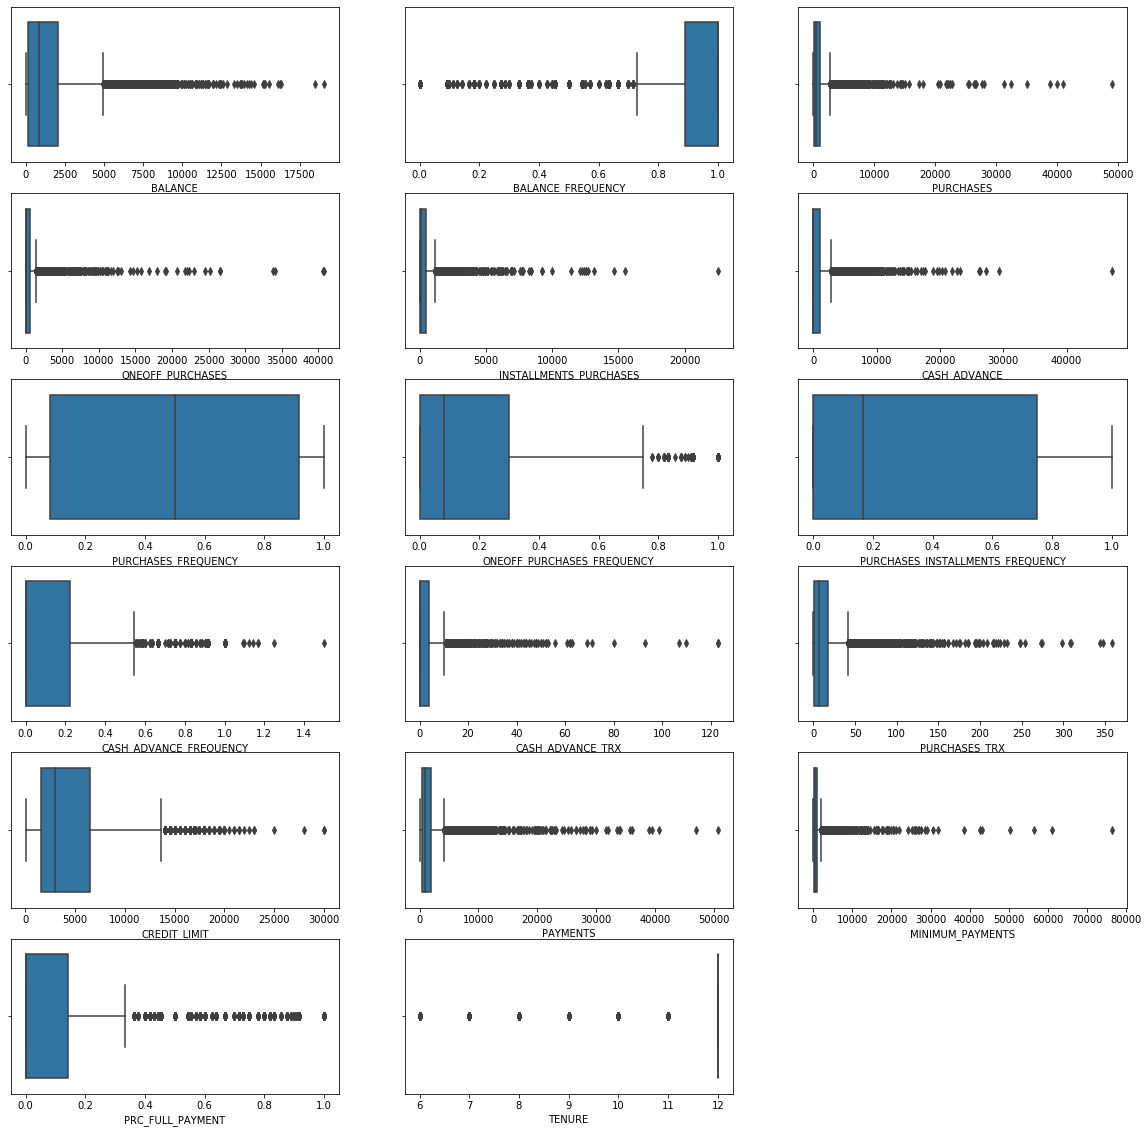

In [16]:
fig = plt.figure(figsize=(20,20))
for col in range(len(df.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df.iloc[ : , col])
plt.show()

There are too many outliers. We have to get rid of them first. Values within -3z and 3z will be kept; others will be deleted. 

In [17]:
df = df[df['BALANCE'] < (1564*3)] 

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,5835.0,848.166245,987.152400,0.000000,57.852811,477.165840,1304.564872,4688.103434
BALANCE_FREQUENCY,5835.0,0.851844,0.259383,0.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,5835.0,422.531088,473.195285,0.000000,37.400000,266.680000,639.075000,2580.630000
ONEOFF_PURCHASES,5835.0,220.603962,369.677539,0.000000,0.000000,0.000000,299.950000,1616.760000
INSTALLMENTS_PURCHASES,5835.0,202.255140,276.183445,0.000000,0.000000,65.380000,331.655000,1160.840000
CASH_ADVANCE,5835.0,329.017329,559.541066,0.000000,0.000000,0.000000,446.073466,2297.002595
PURCHASES_FREQUENCY,5835.0,0.452258,0.386021,0.000000,0.083333,0.416667,0.833333,1.000000
ONEOFF_PURCHASES_FREQUENCY,5835.0,0.144409,0.243763,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,5835.0,0.334260,0.380818,0.000000,0.000000,0.166667,0.666667,1.000000
CASH_ADVANCE_FREQUENCY,5835.0,0.094473,0.153478,0.000000,0.000000,0.000000,0.166667,1.500000


In [19]:
df.shape

(8182, 17)

In [20]:
df = df[df['PURCHASES'] < (927*3)] 

In [21]:
df.shape

(7548, 17)

In [22]:
df = df[df['ONEOFF_PURCHASES'] < (540*3)] 

In [23]:
df.shape

(7305, 17)

In [24]:
df = df[df['INSTALLMENTS_PURCHASES'] < (387*3)] 

In [25]:
df.shape

(6916, 17)

In [27]:
df = df[df['CASH_ADVANCE'] < (766*3)] 

In [28]:
df.shape

(6166, 17)

In [29]:
df = df[df['CREDIT_LIMIT'] < (3592*3)] 

In [30]:
df.shape

(6010, 17)

In [31]:
df = df[df['PAYMENTS'] < (1130*3)] 

In [32]:
df.shape

(5835, 17)

In [34]:
df = df[df['MINIMUM_PAYMENTS'] < (575*3)] 

In [35]:
df.shape

(5605, 17)

**Hopkins Statistic**

In [36]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [37]:
hopkins(df, df.shape[0])

0.166160938371699

Value of H is close to zero; we can deduce that dataset contains meaningful clusters.

**K-Means Clustering - Not Scaled**

In [78]:
k_means = KMeans(n_clusters = 2).fit(df)

In [79]:
clusters = k_means.labels_

**Elbow Method**

In [80]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df))
    ssd.append(kmeans.inertia_)

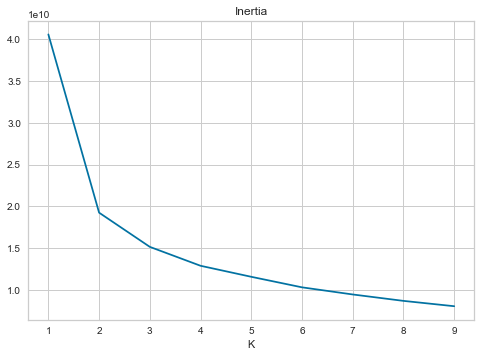

In [81]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia");

In [82]:
from yellowbrick.cluster import KElbowVisualizer

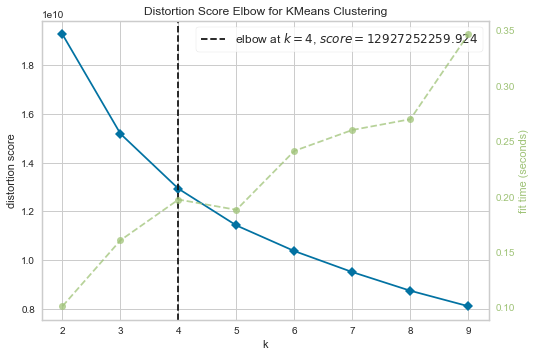

In [83]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df)
visu.poof();

In [84]:
kmeans = KMeans(n_clusters = 4).fit(df)

In [85]:
labels = kmeans.labels_

In [86]:
df['Customer'] = labels

In [87]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Customer
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.0,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,3
7,1823.652743,1.000000,436.20,0.00,436.2,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.0,12,3


In [88]:
df.Customer.value_counts()

3    2709
2    1337
0     881
1     678
Name: Customer, dtype: int64

**Visuals**

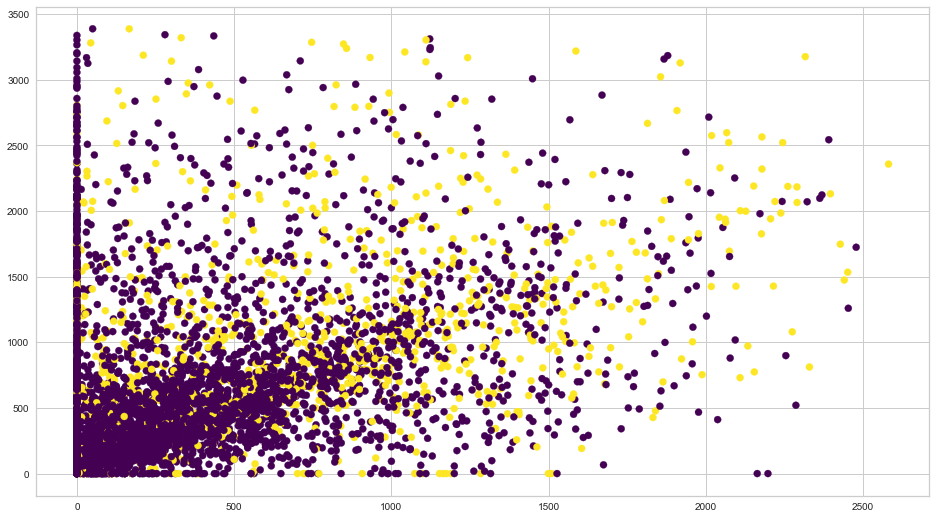

In [93]:
plt.figure(figsize = (16,9))
plt.scatter(df.iloc[:,2], df.iloc[:,13], c = clusters, s = 50, cmap = "viridis");

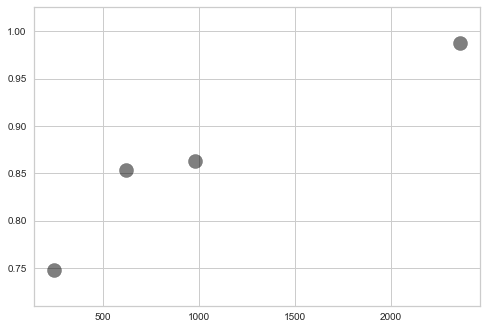

In [91]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

**Silhoutte Score**

In [53]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [54]:
print(f'Silhouette Score(n=4): {silhouette_score(df, labels)}')

Silhouette Score(n=4): 0.3337193598766149


**Hierarchical Theory**

In [55]:
from scipy.cluster.hierarchy import linkage

In [56]:
hc_complete = linkage(df, 'complete')
hc_ward = linkage(df, 'ward')

In [57]:
from scipy.cluster.hierarchy import dendrogram

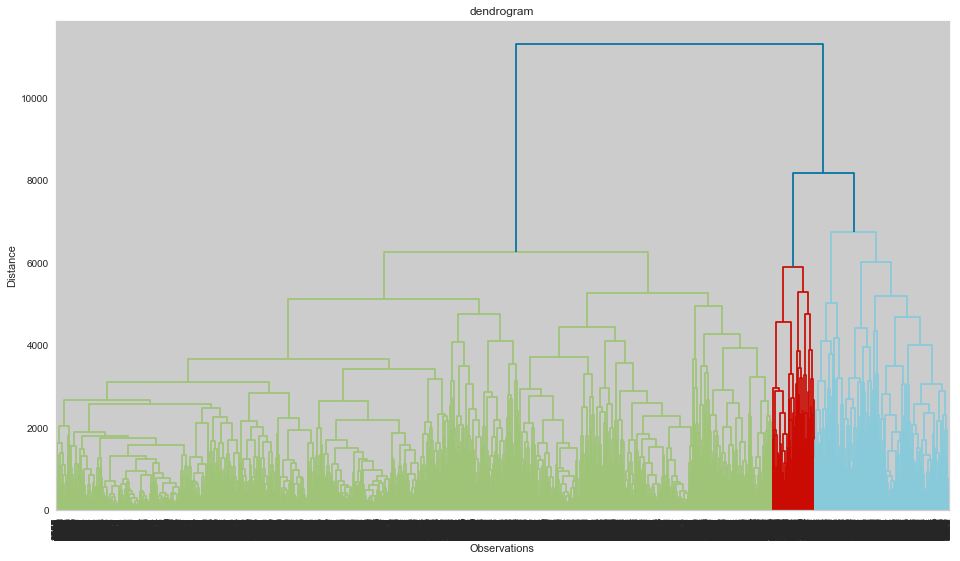

In [58]:
plt.figure(figsize = (16,9))
plt.title('dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_complete, leaf_font_size = 10);

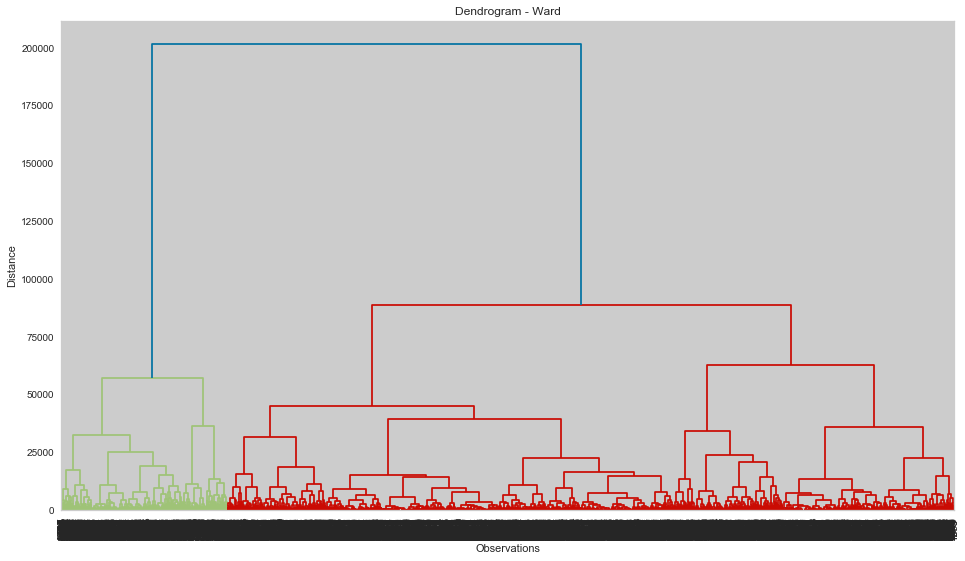

In [59]:
plt.figure(figsize = (16,9))
plt.title('Dendrogram - Ward')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_ward, leaf_font_size = 10);

In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') # linkage default ward
cluster.fit_predict(df)

array([2, 1, 1, ..., 2, 2, 2], dtype=int64)

In [62]:
print(f'Silhouette Score(n=3): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=3): 0.27672832926975655


In [63]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward') # linkage default ward
cluster.fit_predict(df)

array([2, 0, 0, ..., 2, 2, 2], dtype=int64)

In [64]:
print(f'Silhouette Score(n=4): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=4): 0.27564625040790414


In [65]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') # linkage default ward
cluster.fit_predict(df)

array([0, 2, 4, ..., 0, 0, 0], dtype=int64)

In [66]:
print(f'Silhouette Score(n=5): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=5): 0.2682832154396841


In [67]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete') # linkage default ward
cluster.fit_predict(df)

array([1, 2, 2, ..., 1, 1, 1], dtype=int64)

In [68]:
print(f'Silhouette Score(n=3): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=3): 0.4488814076742454


In [69]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete') # linkage default ward
cluster.fit_predict(df)

array([0, 2, 2, ..., 0, 0, 0], dtype=int64)

In [70]:
print(f'Silhouette Score(n=4): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=4): 0.4331911181471068


In [71]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete') # linkage default ward
cluster.fit_predict(df)

array([4, 2, 2, ..., 4, 4, 4], dtype=int64)

In [72]:
print(f'Silhouette Score(n=5): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=5): 0.27943329983586174


The highest **Silhoutte Score** came out for the **Complete-3/4 Clusters** combination.